# Time Series Assignment 3
###  Prepared by Sujil Kumar K.M (D00242726)
##### Air Pollution in the United States

### **Explonatory Data Analysis**

In [1]:
# loading python libraries for analysis
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Load data from google drive folder data is saved in my google drive dataset folder

# !ls "/content/drive/My Drive/dataset/"
# !cp "/content/drive/My Drive/dataset/data.csv" "data.csv"

In [3]:
# reading data from the dataframe
df = pd.read_csv('/content/data.csv')
df.head(3)

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [4]:
# deleted index unnamed column using iloc method
df = df.iloc[: , 1:]
df.head(3)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [5]:
df = df.iloc[:10000 , :]

In [6]:
df.shape

(10000, 28)

In [7]:
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5001.000000,10000.000000,10000.000000,10000.000000,5001.000000
mean,5.296800,14.67280,1504.333600,18.265320,35.613760,13.683600,32.613800,0.022896,0.037605,10.05660,33.623000,1.888294,3.980150,11.009300,6.410918,0.636954,1.275240,9.279300,11.680664
std,0.954987,3.50425,1180.806768,13.197708,27.887599,7.676652,20.813226,0.010723,0.015856,3.31682,18.403172,1.580874,3.434011,6.905084,5.490875,0.468950,1.277991,8.173406,10.508692
min,4.000000,13.00000,2.000000,0.739130,1.900000,0.000000,1.000000,0.001438,0.002000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.00000,1002.000000,9.826087,19.000000,6.000000,18.000000,0.014573,0.026000,9.00000,22.000000,0.958333,2.000000,6.000000,3.000000,0.347826,0.500000,1.000000,6.000000
50%,6.000000,13.00000,1003.000000,15.250000,30.000000,18.000000,28.000000,0.022958,0.037000,10.00000,31.000000,1.636364,3.000000,11.000000,6.000000,0.491667,0.800000,7.000000,8.000000
75%,6.000000,13.00000,3001.000000,23.168478,44.000000,20.000000,42.000000,0.030417,0.048000,11.00000,41.000000,2.454545,5.000000,17.000000,9.000000,0.752174,1.600000,19.000000,15.000000
max,6.000000,25.00000,3003.000000,139.541667,267.000000,23.000000,132.000000,0.063167,0.113000,23.00000,195.000000,19.375000,29.000000,23.000000,41.000000,5.633333,15.100000,23.000000,126.000000


In [8]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

In [9]:
# data has been described
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,5001.000000,10000.000000,10000.000000,10000.000000,5001.000000
mean,5.296800,14.67280,1504.333600,18.265320,35.613760,13.683600,32.613800,0.022896,0.037605,10.05660,33.623000,1.888294,3.980150,11.009300,6.410918,0.636954,1.275240,9.279300,11.680664
std,0.954987,3.50425,1180.806768,13.197708,27.887599,7.676652,20.813226,0.010723,0.015856,3.31682,18.403172,1.580874,3.434011,6.905084,5.490875,0.468950,1.277991,8.173406,10.508692
min,4.000000,13.00000,2.000000,0.739130,1.900000,0.000000,1.000000,0.001438,0.002000,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,13.00000,1002.000000,9.826087,19.000000,6.000000,18.000000,0.014573,0.026000,9.00000,22.000000,0.958333,2.000000,6.000000,3.000000,0.347826,0.500000,1.000000,6.000000
50%,6.000000,13.00000,1003.000000,15.250000,30.000000,18.000000,28.000000,0.022958,0.037000,10.00000,31.000000,1.636364,3.000000,11.000000,6.000000,0.491667,0.800000,7.000000,8.000000
75%,6.000000,13.00000,3001.000000,23.168478,44.000000,20.000000,42.000000,0.030417,0.048000,11.00000,41.000000,2.454545,5.000000,17.000000,9.000000,0.752174,1.600000,19.000000,15.000000
max,6.000000,25.00000,3003.000000,139.541667,267.000000,23.000000,132.000000,0.063167,0.113000,23.00000,195.000000,19.375000,29.000000,23.000000,41.000000,5.633333,15.100000,23.000000,126.000000


In [10]:
#displaying information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State Code         10000 non-null  int64  
 1   County Code        10000 non-null  int64  
 2   Site Num           10000 non-null  int64  
 3   Address            10000 non-null  object 
 4   State              10000 non-null  object 
 5   County             10000 non-null  object 
 6   City               10000 non-null  object 
 7   Date Local         10000 non-null  object 
 8   NO2 Units          10000 non-null  object 
 9   NO2 Mean           10000 non-null  float64
 10  NO2 1st Max Value  10000 non-null  float64
 11  NO2 1st Max Hour   10000 non-null  int64  
 12  NO2 AQI            10000 non-null  int64  
 13  O3 Units           10000 non-null  object 
 14  O3 Mean            10000 non-null  float64
 15  O3 1st Max Value   10000 non-null  float64
 16  O3 1st Max Hour    1000

In [11]:
'''
State Distribution (Classification Only)
#####################################################################################################

'''
class_count=df.groupby('State').size()
print (class_count)

State
Arizona       3516
California    6484
dtype: int64


In [12]:
# looking for null values
df.isnull().sum()

State Code              0
County Code             0
Site Num                0
Address                 0
State                   0
County                  0
City                    0
Date Local              0
NO2 Units               0
NO2 Mean                0
NO2 1st Max Value       0
NO2 1st Max Hour        0
NO2 AQI                 0
O3 Units                0
O3 Mean                 0
O3 1st Max Value        0
O3 1st Max Hour         0
O3 AQI                  0
SO2 Units               0
SO2 Mean                0
SO2 1st Max Value       0
SO2 1st Max Hour        0
SO2 AQI              4999
CO Units                0
CO Mean                 0
CO 1st Max Value        0
CO 1st Max Hour         0
CO AQI               4999
dtype: int64

In [13]:
'''
Correlations between Attributes 
#######################################################################################################
Explain postive and negative Correlations

'''

'\nCorrelations between Attributes \n#######################################################################################################\nExplain postive and negative Correlations\n\n'

In [14]:
Correlations=df.corr()
print(Correlations)

                   State Code  County Code  Site Num  NO2 Mean  \
State Code           1.000000    -0.146223 -0.443978 -0.458789   
County Code         -0.146223     1.000000 -0.403702 -0.028459   
Site Num            -0.443978    -0.403702  1.000000  0.324059   
NO2 Mean            -0.458789    -0.028459  0.324059  1.000000   
NO2 1st Max Value   -0.453837     0.095081  0.268791  0.921676   
NO2 1st Max Hour    -0.135558     0.044749  0.029770  0.160410   
NO2 AQI             -0.513182     0.139147  0.282839  0.901101   
O3 Mean             -0.052136     0.253651 -0.050824 -0.306198   
O3 1st Max Value    -0.243981     0.297252  0.027629 -0.040402   
O3 1st Max Hour      0.012440    -0.054818  0.005034  0.022467   
O3 AQI              -0.216235     0.277386  0.018255 -0.015993   
SO2 Mean            -0.193287    -0.038610  0.122848  0.354199   
SO2 1st Max Value   -0.158366    -0.062364  0.197544  0.354916   
SO2 1st Max Hour    -0.060310     0.008037  0.085047  0.182009   
SO2 AQI   

In [15]:
'''Data Skew ~~~~~~~~~~~~~~to identify the nature of the data '''
skew_data=df.skew()
print(skew_data)

State Code          -0.621703
County Code          1.967556
Site Num             0.255663
NO2 Mean             3.011818
NO2 1st Max Value    3.612277
NO2 1st Max Hour    -0.509253
NO2 AQI              1.739987
O3 Mean              0.230539
O3 1st Max Value     0.360831
O3 1st Max Hour      1.300666
O3 AQI               1.938335
SO2 Mean             3.138974
SO2 1st Max Value    2.291787
SO2 1st Max Hour     0.158253
SO2 AQI              1.999192
CO Mean              2.612306
CO 1st Max Value     3.137291
CO 1st Max Hour      0.515737
CO AQI               2.990467
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


### Data Visualization

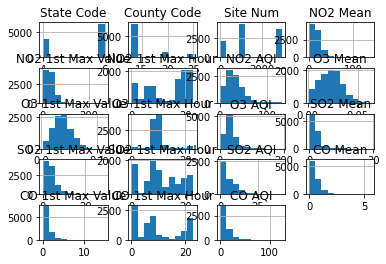

In [16]:
from matplotlib import pyplot
histogram=df.hist()
layout = 5,4
pyplot.show()

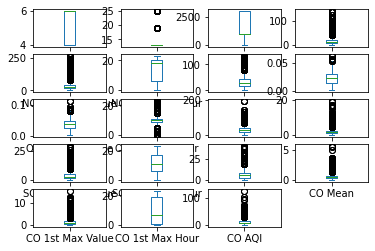

In [17]:
M=df.plot(kind='box',subplots=True,layout=(5,4),sharex=False,sharey=False)
layout = 5,5

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


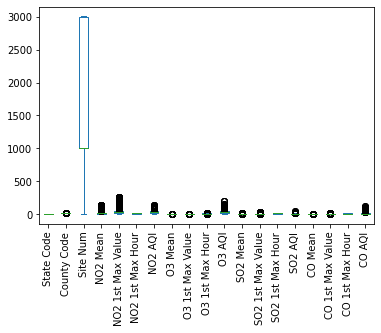

In [18]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=False,layout=(4,3),sharex=False,sharey=False)
layout = 5,8
plt.xticks(rotation = 90)
plt.show()

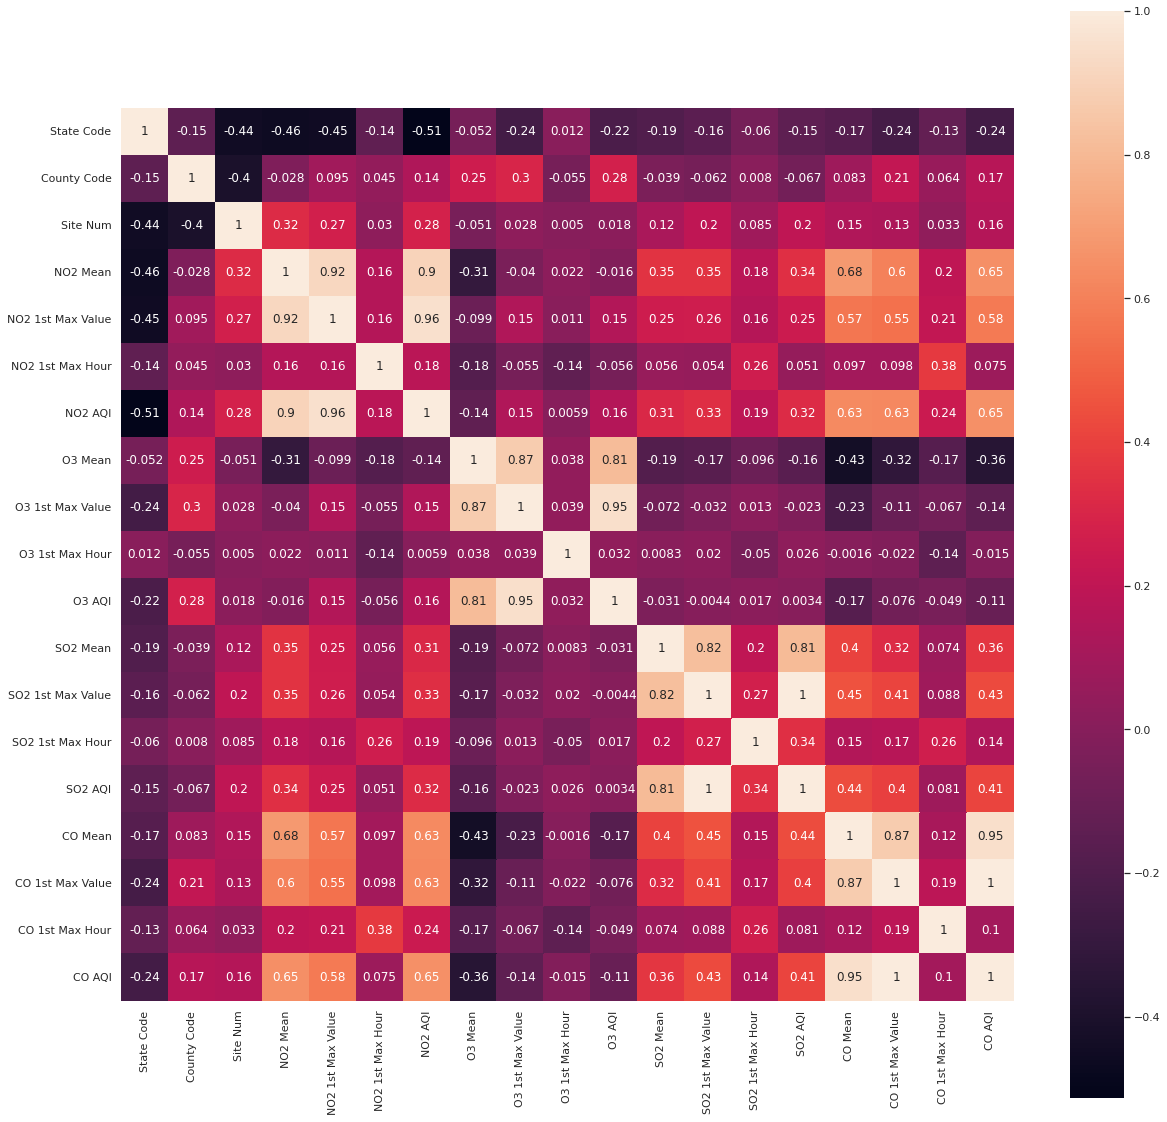

In [19]:
import seaborn as sns
corr = df.corr()
sns.set(rc = {'figure.figsize':(20,20)})
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=0)
plt.show()

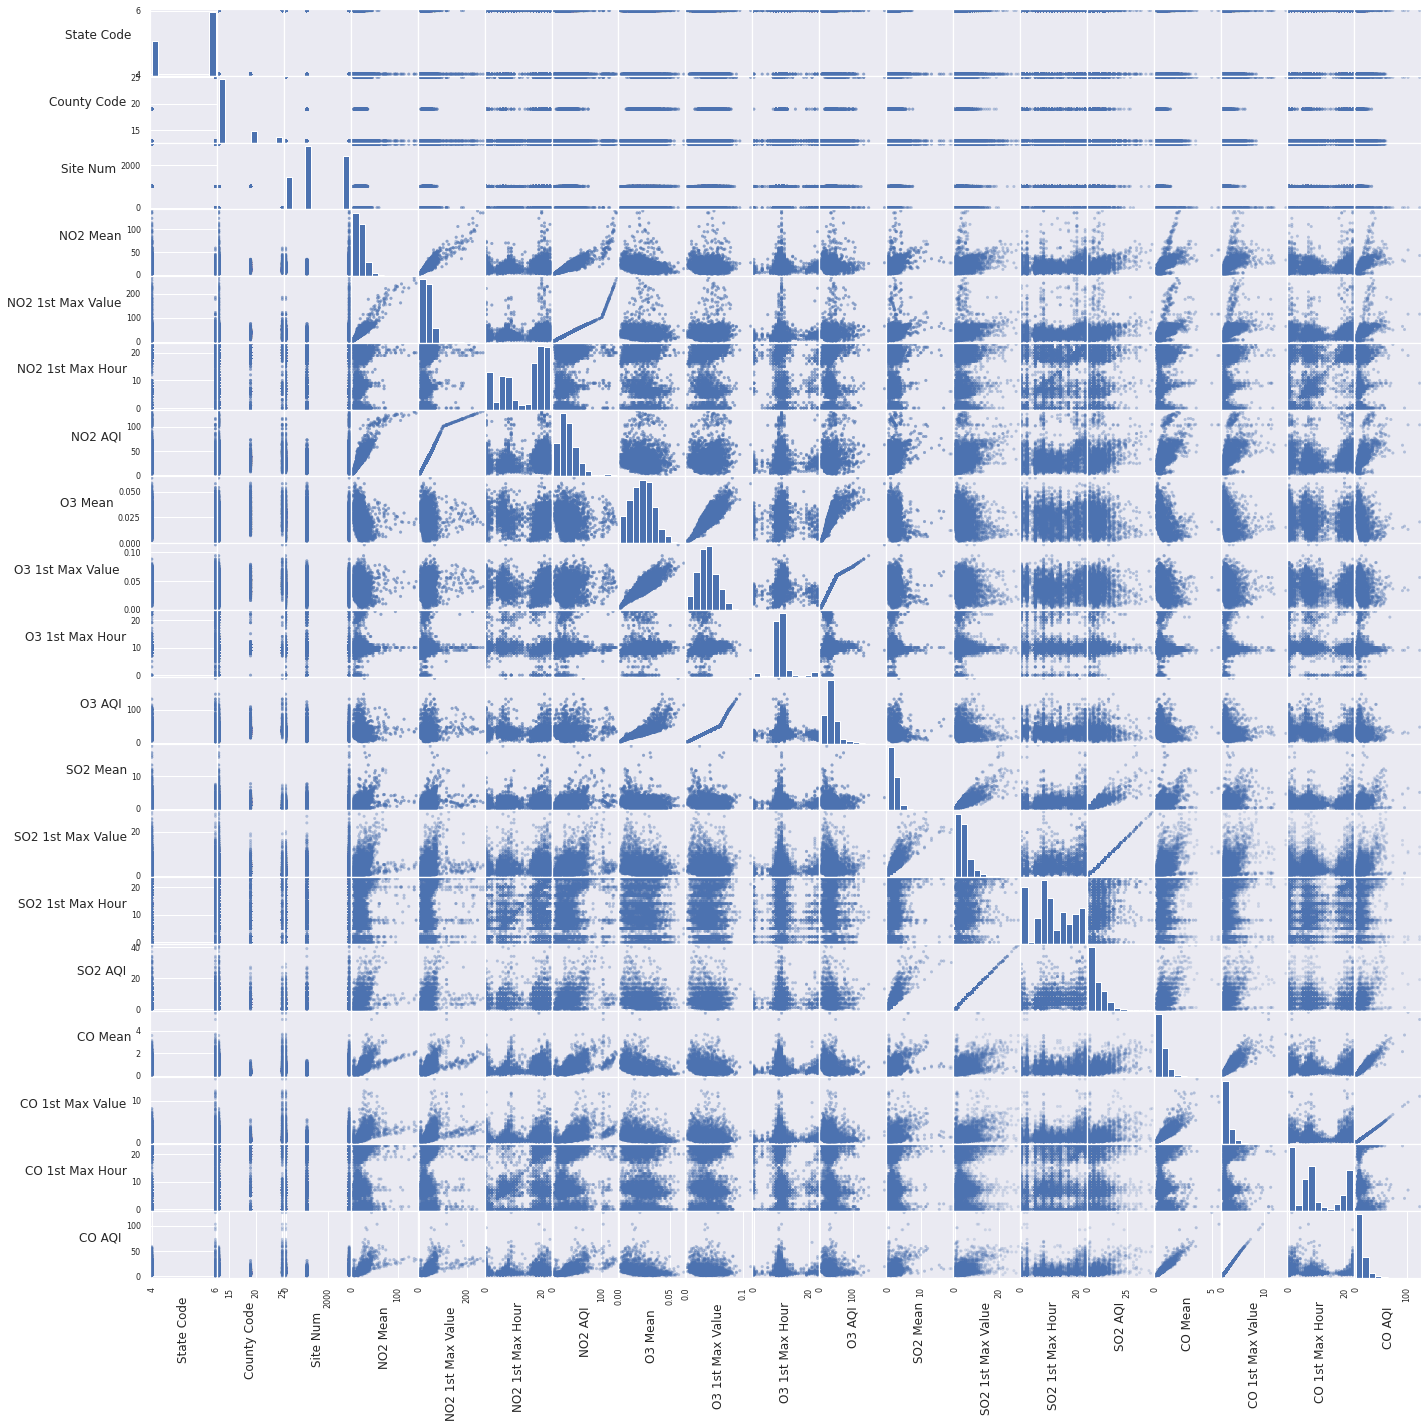

In [20]:
from pandas.plotting import scatter_matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
import seaborn as sns

# Pairplot for overlook
sns.pairplot(df,hue='State')